Dataset Information
The dataset contains 3 classes of 50 instances each, where each class refers to a type of Iris plant. one class is lineraly sepearable from the other 2;the latter are NOT lineraly seperable from each other.

Attribute information:

1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)
5. class (Iris-setosa, Iris-versicolor, Iris-virginica)

Import Modules

In [1]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report


Loading the dataset

In [2]:
iris= pd.read_csv("data/IRIS.xls")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#to display no.of samples on each dataset
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Preprocessing the dataset

In [7]:
#check for null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis

<Axes: >

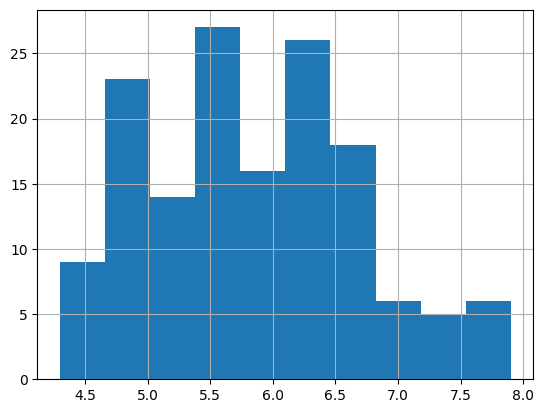

In [8]:
iris['sepal_length'].hist()

<Axes: >

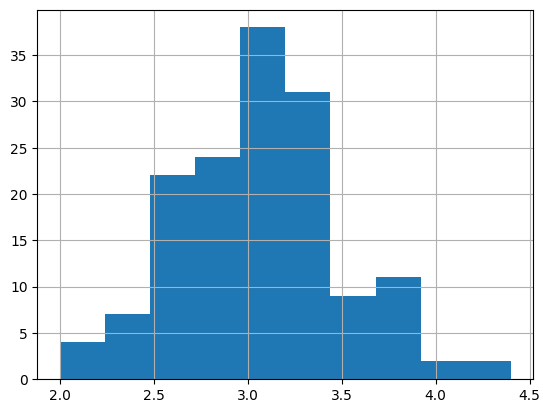

In [9]:
iris['sepal_width'].hist()


<Axes: >

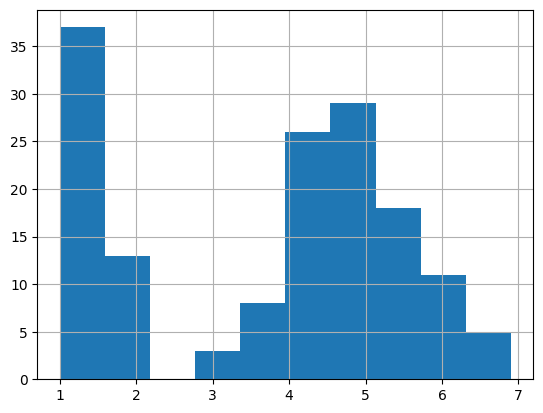

In [10]:
iris['petal_length'].hist()

<Axes: >

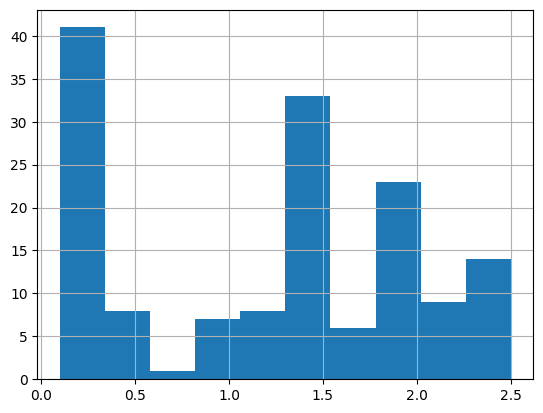

In [11]:
iris['petal_width'].hist()

In [12]:
#scatterplot
colors=['red','orange','green']
species=['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

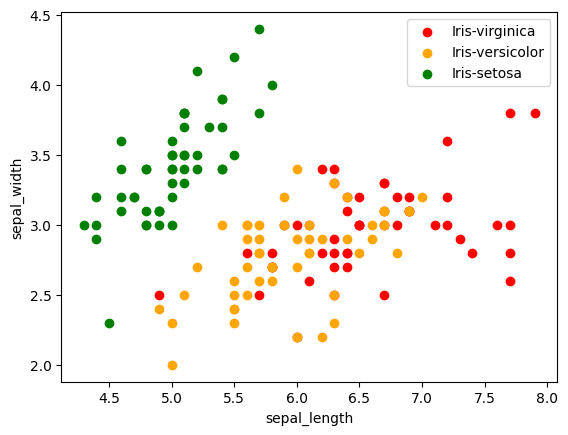

In [14]:
for i in range(3):
    x=iris[iris['species']== species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c= colors[i], label= species[i])
plt.xlabel('sepal_length') 
plt.ylabel("sepal_width")
plt.legend()   

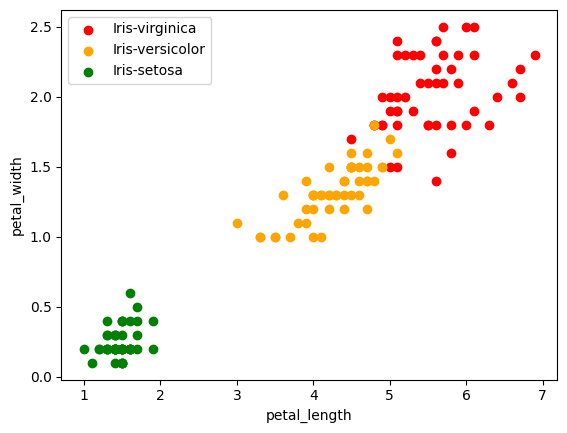

In [13]:
for i in range(3):
    x=iris[iris['species']== species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c= colors[i], label= species[i])
plt.xlabel('petal_length') 
plt.ylabel("petal_width")
plt.legend()   

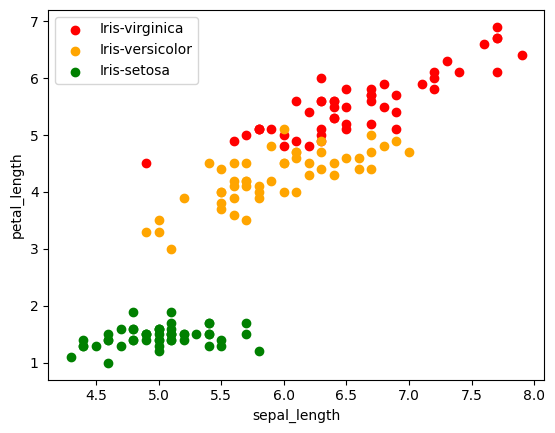

In [14]:
for i in range(3):
    x=iris[iris['species']== species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c= colors[i], label= species[i])
plt.xlabel('sepal_length') 
plt.ylabel("petal_length")
plt.legend()   

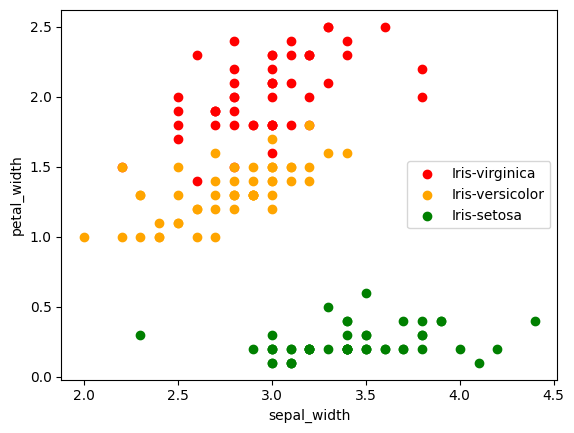

In [15]:
for i in range(3):
    x=iris[iris['species']== species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c= colors[i], label= species[i])
plt.xlabel('sepal_width') 
plt.ylabel("petal_width")
plt.legend()   

Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in table shows the correlation between pairs of variables.  The values is in the range of -1 to 1. Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 indicate no correlation. If two variables have high correlation, we can neglect one variable from those two.


In [16]:
iris.corr()

C:\Users\JADAV SRIVANI\AppData\Local\Temp\ipykernel_5712\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\JADAV SRIVANI\AppData\Local\Temp\ipykernel_5712\1797488412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= iris.corr()


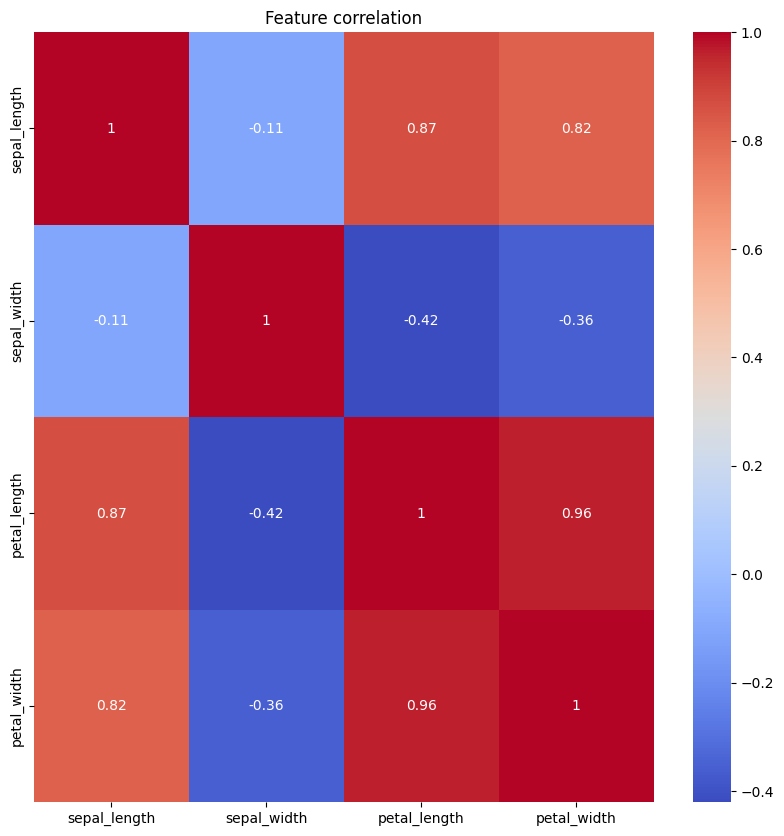

In [17]:
corr= iris.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.title("Feature correlation")
plt.show()

Label Encoder

In machine learning, label encoding is a technique used to convert categorical labels into numerical format, allowing algorithms to better interpret and process the data. These labels can be in the form of words or numbers.

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [19]:
iris['species_encoded'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Model Training

In [ ]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = iris.drop(columns=['species','species_encoded'])
Y=iris['species_encoded']

selector = SelectKBest(score_func=mutual_info_classif, k='all')
scores = selector.fit(X, Y).scores_

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print("Feature Importance:")
display(feature_scores.sort_values(by='Score', ascending=False))

💡 Feature Importance:


,Feature,Score
3,petal_width,0.998869
2,petal_length,0.983570
0,sepal_length,0.496655
1,sepal_width,0.255737


In [21]:
x_train, x_test,y_train, y_test= train_test_split(X, Y , test_size=0.30)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
models={
     "LogisticRegression": LogisticRegression(),
     "KNeighborsClassifier": KNeighborsClassifier(),
     "DecisionTreeClassifier": DecisionTreeClassifier(),
     
}
results = []

for name, model in models.items():
     #model training
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #print metric to get performance
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📊 {name} Accuracy: {acc*100:.2f}%")
    
    print(confusion_matrix(y_test, y_pred))
    
    print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

    results.append((name, acc*100))



📊 LogisticRegression Accuracy: 97.78%
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


📊 KNeighborsClassifier Accuracy: 95.56%
[[14  0  0]
 [ 0 16  2]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45


📊 DecisionTreeClassifier Accuracy: 93.33%

C:\Users\JADAV SRIVANI\AppData\Local\Temp\ipykernel_5712\520291518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='viridis')
c:\Users\JADAV SRIVANI\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


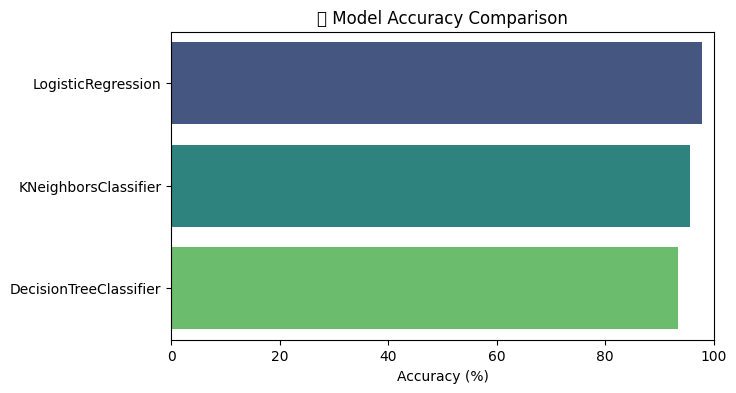

In [23]:
model_names = [r[0] for r in results]
accuracies = [r[1] for r in results]

plt.figure(figsize=(7,4))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.title("🔍 Model Accuracy Comparison")
plt.xlabel("Accuracy (%)")
plt.xlim(0, 100)
plt.show()


In [24]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # example input
prediction = models["KNeighborsClassifier"].predict(sample)
print("🌼 Predicted Species:", le.inverse_transform(prediction)[0])


🌼 Predicted Species: Iris-setosa


c:\Users\JADAV SRIVANI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
